<a href="https://colab.research.google.com/github/BeBrave-BeHumble/Machine_Learning/blob/main/Chapter_6_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1. 단순 선형 회귀(Simple Linear Regression Model)

1. 개념

선형 회귀는 입력 특성에 대한 선형함수를 만들어 예측하는 알고리즘이다. 선형 회귀 모델은 입력 특성의 가중치 합(x*β1)과 절편(편향 β0)을 더해 예측을 수행한다.

선형 회귀 모델을 이용해 train set에 가장 적합하도록 모델 파라미터를 설정하는 과정을 '모델을 학습시킨다'고 한다. 널리 사용되는 성능평가지표는 MSE이며, 이를 최소로 하는 파라미터를 찾아야 한다.

이 과정에서 통계적 방식의 회귀분석과 머신러닝 모델은 MSE값을 최소화하는 파라미터를 찾는다는 목표가 같지만, 문제해결을 위한 접근방식이 다르다. 통계적 방식에서는 정규방적식을 사용하며, 머신러닝에서는 경사하강법을 사용한다.

2. 정규방정식

정규방정식  β= (X'X)^(-1)X'y 을 사용하면 MSE를 최소로 하는 파라미터를 바로 얻을 수 있다. Least Squares Method(최소자승법)를 코드로 구현하거나, sklearn 패키지를 이용한다.

(1) scikit-learn의 LinearRegression

scikit-learn 패키지로 선형회귀 모델을 학습할 수 있다. scikit-learn의 linear_model의 여러 함수 중, LinearRegression은 최소자승법을 사용한 OLS(Ordinary Least Squares) 방식으로 선형 모델을 구현한다.

즉, 계수 w = (w1, ... ,wp)를 사용해 선형 모델을 피팅하여 데아터세트에 관찰된 대상과 선형 근사에 의해 예측된 대상 간의 잔차제곱합을 최소화한다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


나이와 의료비용 사이의 선형 모델을 생성하기에 앞서, 두 데이터 사이의 선형성을 확인해보아야 한다. 산점도를 이용해 두 값에서 선형성이 발견되는지 확인한다.

나이와 의료비용 사이에 선형성이 발견되며, 우상향하는 추세를 확인할 수 있다.

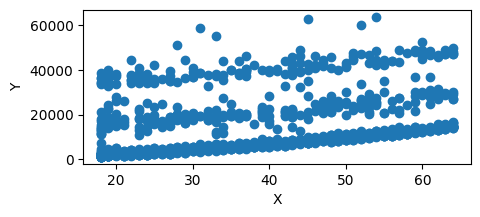

In [33]:
x = data['age']
y = data['charges']

plt.figure(figsize = (5,2))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [19]:
x = np.array(data['age']) # (1338,) -> 1차원 벡터
y = np.array(data['charges']) # (1338,)
print(x)
print('='*56)
x = x.reshape(1338, 1) # fit에는 2차원 배열만 들어가므로 reshape. dataframe도 가능
y = y.reshape(1338, 1) # -> 2차원 행렬
print(x)

[19 18 28 ... 18 21 61]
[[19]
 [18]
 [28]
 ...
 [18]
 [21]
 [61]]


In [26]:
lr = LinearRegression()
lr.fit(x, y)
print("선형회귀모델 결과")
print("절편:", np.round(lr.intercept_, 3), ", 계수:", np.round(lr.coef_, 3))

선형회귀모델 결과
절편: [3165.885] , 계수: [[257.723]]


In [28]:
# 결정계수

print(lr.score(x, y)) # 8%로 설명력 매우 낮다

0.08940589967885804


새로운 데이터를 선형회귀모델에 입력한 뒤 나이에 따른 의료비용을 예측해보자.

19살은 8062.62원을 64세는 19660.13원을 의료비용으로 지출한다고 해석할 수 있다.

In [29]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)

# -> 19살은 8062.62원을 64세는 19660.13원을 의료비용으로 지출한다

[[ 8062.61476073]
 [19660.13260074]]


산점도에 회귀선을 그어 선형모델이 데이터를 얼마나 잘 설명하는지 시각화해보자.

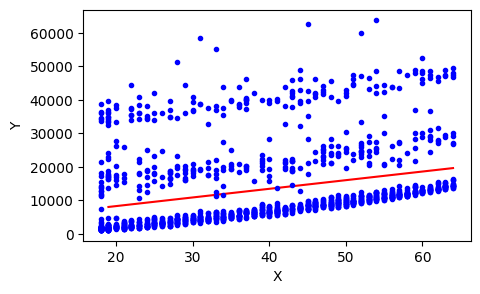

In [35]:
plt.figure(figsize = (5, 3))
plt.plot(x_new, y_hat, "-r")
plt.plot(x, y, "b.")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

2. 경사하강법

(1) 경사하강법(Gradient Descent)은 함수의 값이 낮아지는 방향으로 독립변수의 값을 바꿔가면서 최종적으로 최소 함숫값을 갖도록 하는 독립변수의 값을 찾는 방식이다. 최적의 해를 찾는 최적화 알고리즘으로서, 함수를 최소화하기 위해 파라미터를 반복적으로 조정해나간다.

머신러닝에서 경사하강법을 사용하는 이유는 두 가지이다. 첫째로, 분석에서 마주하는 함수들은 형태가 보갑해 수식으로 미분 계수와 그 해를 찾기 어려울 수 있다. 둘째로, 데이터의 양이 큰 경우 경사하강법이 상대적으로 쉽게 구현된다.

Random Initalization(무작위 초기화)를 통해 임의의 값으로 시작해 함수의 값이 감소하는 방향으로 최솟값에 수렴할 때까지 점진적으로 진행한다. 이때 학습 스텝의 크기를 learning rate라고 한다.

(2) 경사하강법의 종류

- 배치 경사하강법

  - 반복 시 전체 훈련세트를 사용해 가중값을 갱신한다.
  - 특징: 계산량이 많아 소요시간이 증가한다. But 학습 시 발생하는 잡음이 적은 최적치를 찾을 수 있다.

- 확률적 경사하강법

  - 한 개의 샘플데이터를 무작위로 선택하고 그 샘플에 대한 경사를 계산한다. 매 반복마다 가중값이 달라지기 때문에 비용함수가 최솟값에 접근할 때 확률값으로 요동치며 평균적으로 감소한다.
  - 특징: 최솟값에 요동치며 접근하기 때문에 최적치가 아닐 수 있다. But 지역 최솟값을 건너뛰고 전역 최솟값으로 다다를 가능성이 높고, 계산 속도가 빠르다

- 미니 배치 경사하강법

  - 각 스텝을 반복할 때 임의의 30~50개 관측값으로 경사를 계산하고 모델의 가중값을 갱신한다.
  - 특징: 확률적 경사하강법보다 지역 최솟값에서 빠져나오기 어려울 수도 있다. But 낮은 오차율을 가지므로 최솟값에 더 가까이 도달할 수 있다.


(3) scikit-learn의 SGDRegressor

sklean 패키지로 걍사하강법을 활용한 선형 회귀 모델을 학습할 수 있다. 그중 SGDRegressor은 확률적 경사하강법 회귀 모델을 구현한다.

정규화는 norm L2, norm L1 또는 이 둘의 조합(elastic net)을 이용해 매개변수를 0벡터로 축소하는 손실 함수에 추가된 패널티이다.

- 코드 구현

보험 가입자 데이터를 활용한다.

fit에 입력되는 데이터는 2차원 array여야 하므로 reshape 할 것.

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor

data = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv")

In [40]:
x = np.array(data['age'])
y = np.array(data['charges'])
print(x.shape, y.shape)

(1338,) (1338,)


In [41]:
x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

In [42]:
y.ravel()
''' 다차원 배열을 1차원 배열로 평평하게(flatten) 만들어주는 함수
 원본과 메모리를 공유하므로
 복사본이 필요할 경우에는 np.flatten() '''

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [47]:
sgd_reg = SGDRegressor(max_iter = 1000, random_state = 56)
sgd_reg.fit(x, y.ravel())
print("절편:", np.round(sgd_reg.intercept_, 3), ", 계수:", np.round(sgd_reg.coef_, 3))

절편: [-541.315] , 계수: [371.583]


In [49]:
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[ 6518.76812781 23240.01686012]


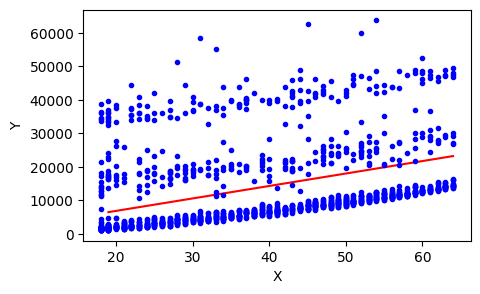

In [51]:
plt.figure(figsize = (5, 3))
plt.plot(x_new, y_hat, "-r")
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()